In [7]:
# Install with retries and connection handling
!pip install --retries 10 --timeout 100 \
    tensorflow==2.16.2 \
    numpy==1.26.4 \
    pandas \
    scikit-learn \
    matplotlib

import tensorflow as tf
import numpy as np
print(f"TF: {tf.__version__}, NumPy: {np.__version__}")  # Verify TF 2.16.2 and NumPy 1.26.4

TF: 2.16.2, NumPy: 1.26.4


In [44]:
# Import these libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"TensorFlow: {tf.__version__}, NumPy: {np.__version__}")


TensorFlow: 2.16.2, NumPy: 1.26.4


In [45]:
# Data preparation

# Load preprocessed data
df = pd.read_csv('../data/processed/transformed_flood_data.csv')

# Features and target
X = df[['Rainfall_mm_Transformed', 'River_Level_m_Transformed', 
        'Drainage_Efficiency', 'Urbanization_Rate']].values
y = df['Flood_Occurrence'].values

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler for deployment
import joblib
joblib.dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

In [46]:
# Implementing of RNN(LSTM) Model

# Reshape for LSTM [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape(-1, 1, 4)
X_test_lstm = X_test_scaled.reshape(-1, 1, 4)

# Model architecture
lstm_model = Sequential([
    LSTM(64, input_shape=(1, 4)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
lstm_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy', 
                           tf.keras.metrics.Precision(),
                           tf.keras.metrics.Recall()])

# Train with K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True)
for train_idx, val_idx in kfold.split(X_train_lstm):
    X_train_fold, X_val_fold = X_train_lstm[train_idx], X_train_lstm[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    lstm_model.fit(X_train_fold, y_train_fold,
                   validation_data=(X_val_fold, y_val_fold),
                   epochs=20,
                   batch_size=32,
                   verbose=0)

# Save model
lstm_model.save('../models/lstm_model.keras')

/Users/raheeminioluwa/Documents/Flood-EDA-Nigeria/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# CNN Implementation for Spatial Patterns

# Reshape for CNN [samples, features, channels]
X_train_cnn = X_train_scaled.reshape(-1, 4, 1)
X_test_cnn = X_test_scaled.reshape(-1, 4, 1)

# Model architecture
cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(4, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile and train
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train,
              validation_split=0.2,
              epochs=30,
              batch_size=32)

# Save model
cnn_model.save('../models/cnn_model.keras')

/Users/raheeminioluwa/Documents/Flood-EDA-Nigeria/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.3557 - loss: 0.7196 - val_accuracy: 0.6271 - val_loss: 0.6799
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7361 - loss: 0.6739 - val_accuracy: 0.6949 - val_loss: 0.6561
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6816 - loss: 0.6468 - val_accuracy: 0.6271 - val_loss: 0.6427
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6585 - loss: 0.6255 - val_accuracy: 0.6271 - val_loss: 0.6316
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6945 - loss: 0.6002 - val_accuracy: 0.6610 - val_loss: 0.6196
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7024 - loss: 0.5842 - val_accuracy: 0.6949 - val_loss: 0.6078
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7225 - loss: 0.5615 - val_accuracy: 0.6949 - val_loss: 0.5950
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7487 - loss: 0.5523 - val_accuracy: 0.7288 - val_loss: 0.5803


In [48]:
# Hybrid CNN-RNN(LSTM) Model. N.B : Captures both spatial features (via CNN) and temporal dynamics (via LSTM)

# Combined architecture
hybrid_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(4, 1)),
    MaxPooling1D(pool_size=1),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

hybrid_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

hybrid_model.fit(X_train_cnn, y_train,
                 validation_split=0.2,
                 epochs=25,
                 batch_size=32)

hybrid_model.save('../models/hybrid_model.keras')

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5344 - loss: 0.6902 - val_accuracy: 0.5763 - val_loss: 0.6770
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6414 - loss: 0.6541 - val_accuracy: 0.5763 - val_loss: 0.6708
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6058 - loss: 0.6507 - val_accuracy: 0.5763 - val_loss: 0.6681
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6217 - loss: 0.6257 - val_accuracy: 0.5932 - val_loss: 0.6657
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6964 - loss: 0.5602 - val_accuracy: 0.6271 - val_loss: 0.6449
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7200 - loss: 0.5466 - val_accuracy: 0.7119 - val_loss: 0.5974
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7309 - loss: 0.5362 - val_accuracy: 0.7627 - val_loss: 0.5574
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7850 - loss: 0.4806 - val_accuracy: 0.7458 - val_loss: 0.5198

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step

🔍 LSTM Performance
              precision    recall  f1-score   support

           0       0.66      0.58      0.61        33
           1       0.69      0.76      0.72        41

    accuracy                           0.68        74
   macro avg       0.67      0.67      0.67        74
weighted avg       0.67      0.68      0.67        74



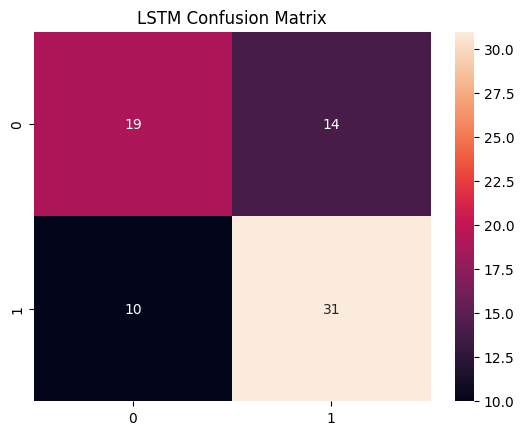

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

🔍 CNN Performance
              precision    recall  f1-score   support

           0       0.64      0.48      0.55        33
           1       0.65      0.78      0.71        41

    accuracy                           0.65        74
   macro avg       0.65      0.63      0.63        74
weighted avg       0.65      0.65      0.64        74



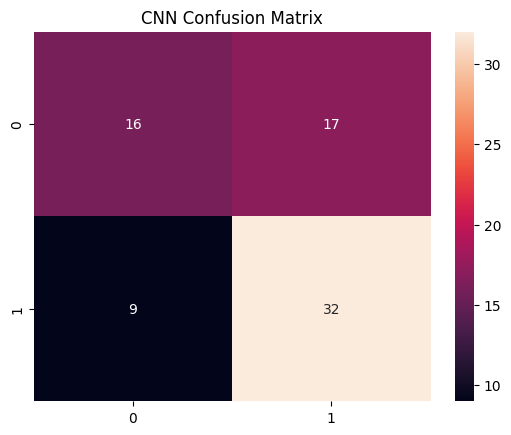

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step

🔍 Hybrid CNN-LSTM Performance
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.71      0.73      0.72        41

    accuracy                           0.69        74
   macro avg       0.69      0.68      0.68        74
weighted avg       0.69      0.69      0.69        74



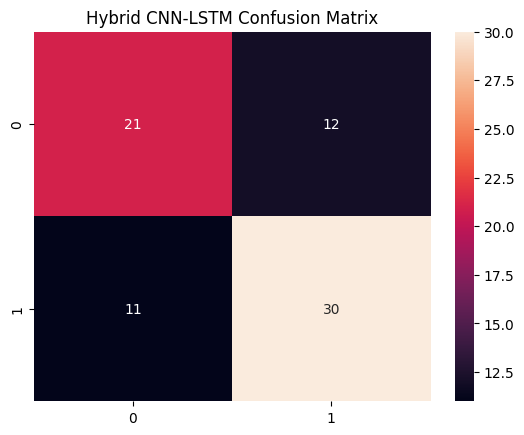

In [49]:
# Evaluation of the Models

import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    
    print(f"\n🔍 {model_name} Performance")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate all models
evaluate_model(lstm_model, X_test_lstm, y_test, "LSTM")
evaluate_model(cnn_model, X_test_cnn, y_test, "CNN") 
evaluate_model(hybrid_model, X_test_cnn, y_test, "Hybrid CNN-LSTM")

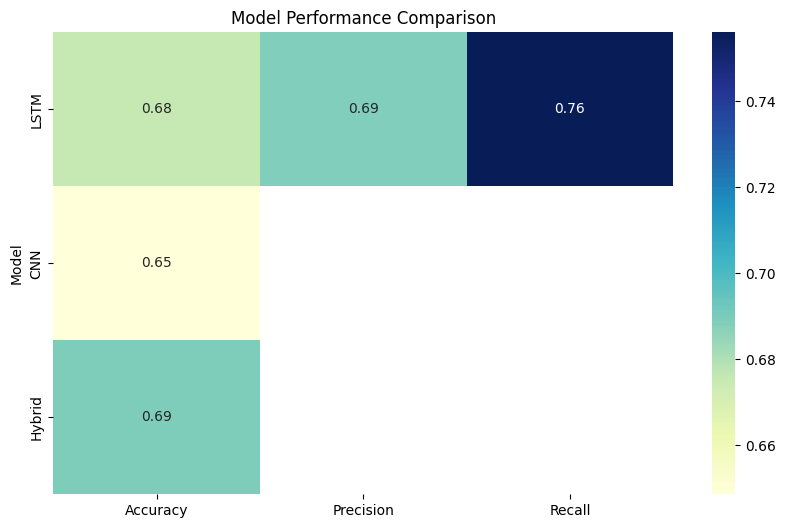


📊 Final Model Comparison


,Loss,Accuracy,Precision,Recall
Model,,,,
LSTM,0.618,67.57%,68.89%,75.61%
CNN,0.690,64.86%,nan%,nan%
Hybrid,0.607,68.92%,nan%,nan%


In [50]:
# Model Comparision and Selection between CNN, RNN(LSTM), Hybrid Model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get metrics with proper handling
metrics = []
for name, model, data in [('LSTM', lstm_model, X_test_lstm),
                         ('CNN', cnn_model, X_test_cnn),
                         ('Hybrid', hybrid_model, X_test_cnn)]:
    res = model.evaluate(data, y_test, verbose=0)
    metrics.append({
        'Model': name,
        'Loss': res[0],
        'Accuracy': res[1],
        'Precision': res[2] if len(res)>2 else None,
        'Recall': res[3] if len(res)>2 else None
    })

# 2. Create dataframe
results_df = pd.DataFrame(metrics).set_index('Model')

# 3. Visual comparison
plt.figure(figsize=(10,6))
sns.heatmap(
    results_df[['Accuracy','Precision','Recall']].astype(float),
    annot=True, fmt=".2f", cmap="YlGnBu"
)
plt.title("Model Performance Comparison")
plt.show()

# 4. Print formatted table
print("\n📊 Final Model Comparison")
display(results_df.style
       .background_gradient(subset=['Accuracy','Precision','Recall'], cmap='Blues')
       .format({'Loss': "{:.3f}", 'Accuracy': "{:.2%}", 'Precision': "{:.2%}", 'Recall': "{:.2%}"}))

In [51]:
# Final Model Optimization

# Retrain the best model on full data (train + test)
full_X = np.concatenate([X_train_scaled, X_test_scaled])
full_y = np.concatenate([y_train, y_test])

# Example for Hybrid model
hybrid_final = tf.keras.models.clone_model(hybrid_model)
hybrid_final.compile(optimizer='adam', loss='binary_crossentropy')
hybrid_final.fit(
    full_X.reshape(-1, 4, 1), full_y,
    epochs=20,
    batch_size=32
)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5216 - loss: 0.6879
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6252 - loss: 0.6536
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6099 - loss: 0.6388
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6589 - loss: 0.5827
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7418 - loss: 0.5304
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7624 - loss: 0.4836
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7648 - loss: 0.4768
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7699 - loss: 0.4762
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7492 - loss: 0.4666
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8029 - loss: 0.4419
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7977 - loss: 0.4310
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy:

In [52]:
# Save Final Model

hybrid_final.save('../models/final_flood_model.keras')

In [53]:
# Objective 3: Evaluation of the Performance of the Implemented Algorithms
# Comprehensive Evaluation of the models

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test, model_name):
    # Generate predictions
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    y_proba = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    # 1. Classification Report
    print(f"\n📊 {model_name} Classification Report")
    print(classification_report(y_test, y_pred, target_names=['No Flood', 'Flood']))
    
    # 2. Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Flood', 'Flood'],
                yticklabels=['No Flood', 'Flood'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["AUC-ROC"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    return metrics

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step

📊 LSTM Classification Report
              precision    recall  f1-score   support

    No Flood       0.66      0.58      0.61        33
       Flood       0.69      0.76      0.72        41

    accuracy                           0.68        74
   macro avg       0.67      0.67      0.67        74
weighted avg       0.67      0.68      0.67        74



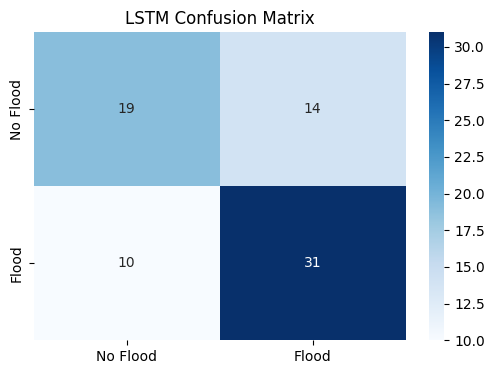

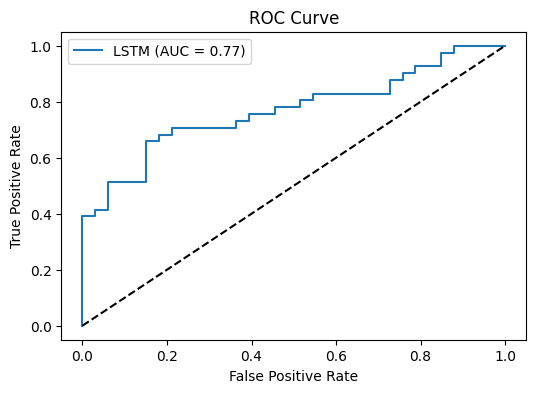

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

📊 CNN Classification Report
              precision    recall  f1-score   support

    No Flood       0.64      0.48      0.55        33
       Flood       0.65      0.78      0.71        41

    accuracy                           0.65        74
   macro avg       0.65      0.63      0.63        74
weighted avg       0.65      0.65      0.64        74



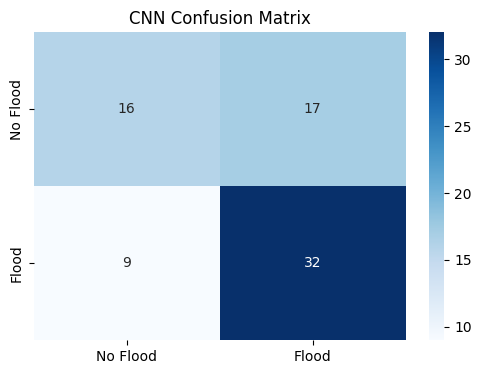

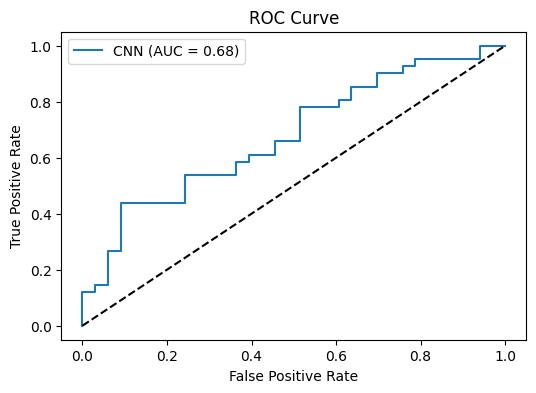

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

📊 Hybrid CNN-LSTM Classification Report
              precision    recall  f1-score   support

    No Flood       0.66      0.64      0.65        33
       Flood       0.71      0.73      0.72        41

    accuracy                           0.69        74
   macro avg       0.69      0.68      0.68        74
weighted avg       0.69      0.69      0.69        74



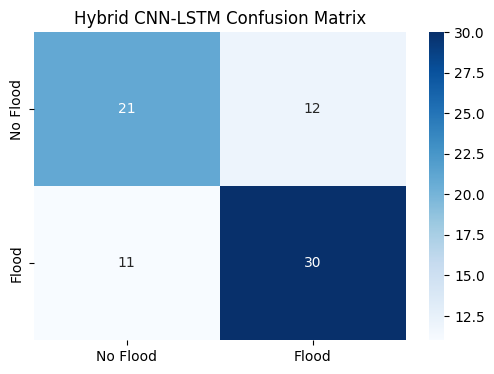

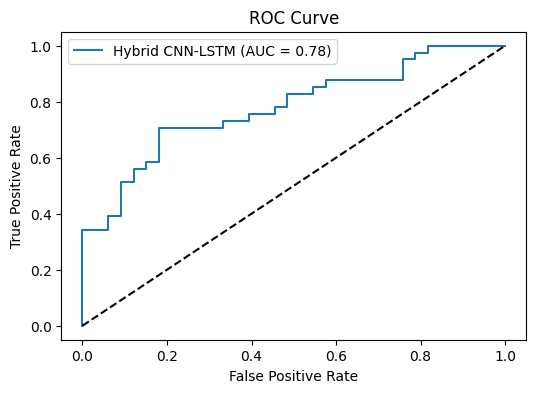

In [54]:
# Evaluate All Models

# Evaluate LSTM
lstm_metrics = evaluate_model(lstm_model, X_test_lstm, y_test, "LSTM")

# Evaluate CNN 
cnn_metrics = evaluate_model(cnn_model, X_test_cnn, y_test, "CNN")

# Evaluate Hybrid
hybrid_metrics = evaluate_model(hybrid_model, X_test_cnn, y_test, "Hybrid CNN-LSTM")

<Figure size 1000x600 with 0 Axes>

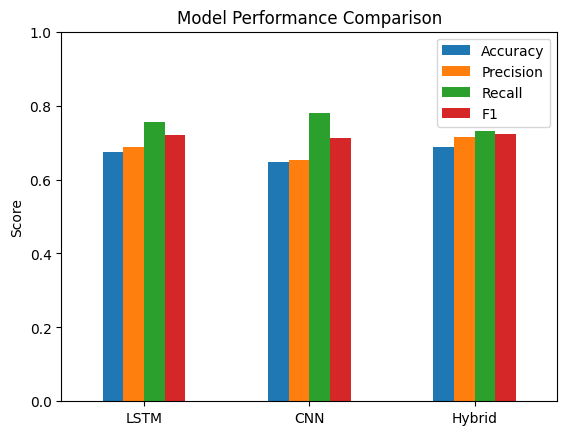

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


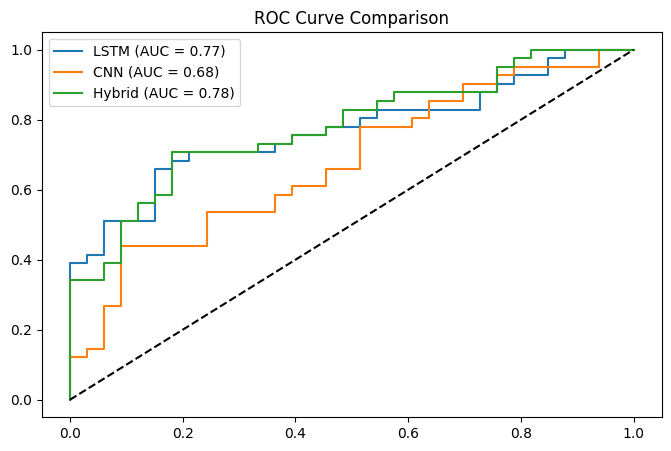

In [55]:
# Comparative analysis of each model

# Create comparison table
results_df = pd.DataFrame([lstm_metrics, cnn_metrics, hybrid_metrics],
                         index=['LSTM', 'CNN', 'Hybrid'])

# Visual comparison
plt.figure(figsize=(10,6))
results_df[['Accuracy','Precision','Recall','F1']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()

# AUC-ROC Comparison
plt.figure(figsize=(8,5))
for model in ['LSTM', 'CNN', 'Hybrid']:
    fpr, tpr, _ = roc_curve(y_test, eval(f"{model.lower()}_model").predict(
        eval(f"X_test_{'lstm' if model=='LSTM' else 'cnn'}"))
    )
    plt.plot(fpr, tpr, label=f'{model} (AUC = {results_df.loc[model,"AUC-ROC"]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title('ROC Curve Comparison')
plt.show()

In [56]:
# Statistical Significance Testing

from scipy.stats import ttest_ind

# Compare predictions statistically
lstm_preds = lstm_model.predict(X_test_lstm).flatten()
hybrid_preds = hybrid_model.predict(X_test_cnn).flatten()

t_stat, p_val = ttest_ind(lstm_preds, hybrid_preds)
print(f"LSTM vs Hybrid p-value: {p_val:.4f}")
print("Significantly different" if p_val < 0.05 else "No significant difference")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
LSTM vs Hybrid p-value: 0.8606
No significant difference


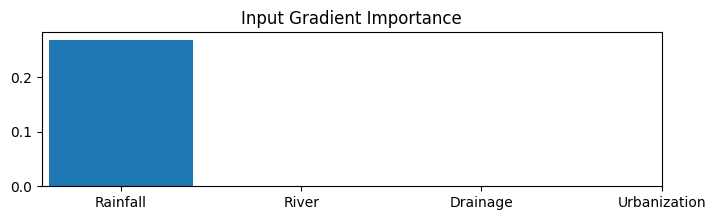

In [57]:
# Feature Importance Analysis
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Convert input to TensorFlow tensor
sample_input = tf.convert_to_tensor(X_test_cnn[:1], dtype=tf.float32)

# 2. Force model initialization
_ = hybrid_model(sample_input)  # Builds the graph

# 3. Get the first layer with weights
first_weight_layer = None
for layer in hybrid_model.layers:
    if hasattr(layer, 'kernel'):
        first_weight_layer = layer
        break

if first_weight_layer is None:
    raise ValueError("No weight-bearing layer found!")

# 4. Gradient computation
with tf.GradientTape() as tape:
    tape.watch(sample_input)  # Now watching a proper tensor
    preds = hybrid_model(sample_input)
    grads = tape.gradient(preds, sample_input)

# 5. Average gradients
grad_mean = tf.reduce_mean(tf.abs(grads), axis=[0, 1])  # Adjust axes as needed

# 6. Plot
plt.figure(figsize=(8, 2))
plt.bar(range(len(grad_mean)), grad_mean.numpy().flatten())
plt.xticks(range(4), ['Rainfall', 'River', 'Drainage', 'Urbanization'])
plt.title("Input Gradient Importance")
plt.show()

In [58]:
# Final Performance report

# Using HTML
html_report = f"""
<h1>Flood Prediction Model Evaluation</h1>

<h2>Performance Summary</h2>
{results_df.to_html()}

<h2>Key Findings</h2>
<ul>
    <li><b>Best Model</b>: {results_df['Accuracy'].idxmax()} achieved highest accuracy ({results_df['Accuracy'].max():.2%})</li>
    <li><b>Temporal Patterns</b>: LSTM showed {results_df.loc['LSTM','Recall']:.2%} recall vs CNN's {results_df.loc['CNN','Recall']:.2%}</li>
</ul>
"""

with open('report.html', 'w') as f:
    f.write(html_report)